-------- > epoch 1:  coût moyen entraînement = 0.6870888471603394
-------- > epoch 1:  taux moyen entraînement = 0.7624791860580444
-------- > epoch 1:  coût moyen validation = 0.640349805355072
-------- > epoch 1:  taux moyen validation = 0.7922999858856201
-------- > epoch 2:  coût moyen entraînement = 0.4820183515548706
-------- > epoch 2:  taux moyen entraînement = 0.8305596113204956
-------- > epoch 2:  coût moyen validation = 0.44259005784988403
-------- > epoch 2:  taux moyen validation = 0.8491001129150391
-------- > epoch 3:  coût moyen entraînement = 0.4332350790500641
-------- > epoch 3:  taux moyen entraînement = 0.845819890499115
-------- > epoch 3:  coût moyen validation = 0.42094656825065613
-------- > epoch 3:  taux moyen validation = 0.853100061416626
-------- > epoch 4:  coût moyen entraînement = 0.4049301743507385
-------- > epoch 4:  taux moyen entraînement = 0.8571198582649231
-------- > epoch 4:  coût moyen validation = 0.4001493752002716
-------- > epoch 4:  taux

-------- > epoch 33:  coût moyen entraînement = 0.25334006547927856
-------- > epoch 33:  taux moyen entraînement = 0.9091804623603821
-------- > epoch 33:  coût moyen validation = 0.3203173577785492
-------- > epoch 33:  taux moyen validation = 0.8877001404762268
-------- > epoch 34:  coût moyen entraînement = 0.25180816650390625
-------- > epoch 34:  taux moyen entraînement = 0.9095606803894043
-------- > epoch 34:  coût moyen validation = 0.31414857506752014
-------- > epoch 34:  taux moyen validation = 0.8914998769760132
-------- > epoch 35:  coût moyen entraînement = 0.24838189780712128
-------- > epoch 35:  taux moyen entraînement = 0.9108803868293762
-------- > epoch 35:  coût moyen validation = 0.3129100501537323
-------- > epoch 35:  taux moyen validation = 0.8912999629974365
-------- > epoch 36:  coût moyen entraînement = 0.2483774870634079
-------- > epoch 36:  taux moyen entraînement = 0.9104207158088684
-------- > epoch 36:  coût moyen validation = 0.31126296520233154
----

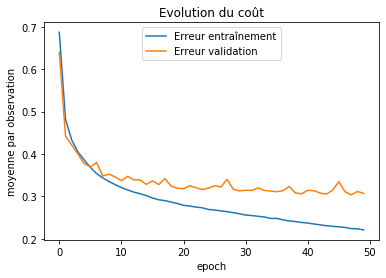

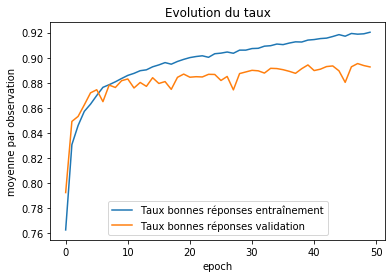

In [2]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Exercice: FashionMNIST avec PyTorch
Exemple avec nn.Sequential et F.cross_entropy
Production de métriques avec graphes
Fonction entrainer
"""
import torch
torch.manual_seed(0) # Pour résultats reproductibles

# Fonction J d'entropie croisée
import torch.nn.functional as F
fonction_cout = F.cross_entropy

def taux_bonnes_predictions(lot_Y_predictions, lot_Y):
    predictions_categorie = torch.argmax(lot_Y_predictions, dim=1)
    return (predictions_categorie == lot_Y).float().mean()

from torch import nn
# Définition de l'architecture du RNA

modele = nn.Sequential(
    nn.Conv2d(1,5,3), # 1 canal, 5 filtres, dimension 3 par 3
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(26*26*5, 10)
)
    
from torch import optim
optimiseur = optim.SGD(modele.parameters(), lr=0.05)

import torchvision
import torchvision.transforms as transforms

#Chargement des données
ds = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())
ds_ent, ds_valid = torch.utils.data.random_split(ds, [50000, 10000])
ds_test = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transforms.ToTensor())

#Création du DataLoader avec le dataset
dl_ent = torch.utils.data.DataLoader(ds_ent, batch_size=100, shuffle = True)
dl_valid = torch.utils.data.DataLoader(ds_valid, batch_size=100)

def entrainer(modele, dl_ent, dl_valid, optimiseur, nb_epochs=10):

    # Listes pour les métriques par epoch
    liste_cout_moyen_ent = []
    liste_taux_moyen_ent = []
    liste_cout_moyen_valid = []
    liste_taux_moyen_valid = []
    
    # Boucle d'apprentissage
    for epoch in range(nb_epochs):
        cout_total_ent = 0 # pour cumuler les couts par mini-lot
        taux_bonnes_predictions_ent = 0 # pour cumuler les taux par mini-lot
        modele.train() # Pour certains types de couches (nn.BatchNorm2d, nn.Dropout, ...)
        
        # Boucle d'apprentissage par mini-lot pour une epoch
        for lot_X, lot_Y in dl_ent:
            optimiseur.zero_grad() # Remettre les dérivées à zéro
            lot_Y_predictions = modele(lot_X) # Appel de la méthode forward
            cout = fonction_cout(lot_Y_predictions, lot_Y)
            cout.backward() # Calcul des gradiants par rétropropagation
            with torch.no_grad():
                cout_total_ent +=cout
                taux_bonnes_predictions_ent += taux_bonnes_predictions(lot_Y_predictions, lot_Y)
            optimiseur.step() # Mise à jour des paramètres
        # Calculer les moyennes par mini-lot
        with torch.no_grad():
            cout_moyen_ent = cout_total_ent/len(dl_ent)
            taux_moyen_ent = taux_bonnes_predictions_ent/len(dl_ent)
       
        modele.eval() # Pour certains types de couches (nn.BatchNorm2d, nn.Dropout, ...)
        with torch.no_grad():
            cout_valid = sum(fonction_cout(modele(lot_valid_X), lot_valid_Y) for lot_valid_X, lot_valid_Y in dl_valid)
            taux_bons_valid = sum(taux_bonnes_predictions(modele(lot_valid_X), lot_valid_Y) for lot_valid_X, lot_valid_Y in dl_valid)
        cout_moyen_valid = cout_valid/len(dl_valid)
        taux_moyen_valid = taux_bons_valid/len(dl_valid)
        print(f'-------- > epoch {epoch+1}:  coût moyen entraînement = {cout_moyen_ent}')
        print(f'-------- > epoch {epoch+1}:  taux moyen entraînement = {taux_moyen_ent}')
        print(f'-------- > epoch {epoch+1}:  coût moyen validation = {cout_moyen_valid}')
        print(f'-------- > epoch {epoch+1}:  taux moyen validation = {taux_moyen_valid}')
    
        liste_cout_moyen_ent.append(cout_moyen_ent)
        liste_taux_moyen_ent.append(taux_moyen_ent)
        liste_cout_moyen_valid.append(cout_moyen_valid)
        liste_taux_moyen_valid.append(taux_moyen_valid)
    
    # Affichage du graphique d'évolution des métriques par epoch
    import numpy as np
    import matplotlib.pyplot as plt
    plt.plot(np.arange(0,nb_epochs),liste_cout_moyen_ent,label='Erreur entraînement')
    plt.plot(np.arange(0,nb_epochs),liste_cout_moyen_valid,label='Erreur validation')
    plt.title("Evolution du coût")
    plt.xlabel('epoch')
    plt.ylabel('moyenne par observation')
    plt.legend(loc='upper center')
    plt.show()
        
    plt.plot(np.arange(0,nb_epochs),liste_taux_moyen_ent,label='Taux bonnes réponses entraînement')
    plt.plot(np.arange(0,nb_epochs),liste_taux_moyen_valid,label='Taux bonnes réponses validation')
    plt.title("Evolution du taux")
    plt.xlabel('epoch')
    plt.ylabel('moyenne par observation')
    plt.legend(loc='lower center')
    plt.show()

entrainer(modele, dl_ent, dl_valid, optimiseur, nb_epochs=50)